# DSCI 521: Data Analysis and Interpretation <br> Phase 1 Report: Investigating the Impact of Weather Patterns <br> and Extreme Weather Events on Community Economic Health

### Phase 1 report checklist
Here's a checklist of items that you _absolutely_ should include:

1. [ ] a background report on the team's members, their self-identified skills, and individual contributions
- [ ] a discussion of what you would like to your analysis to do, who/what it will support
- [ ] an exhibition of analyses from dataset(s) explored, including visual analyses, captions, and useful descripitions
- [ ] a discussion of who might be interested in your analysis
- [ ] a discussion of how your analysis might fit into an application or investigation
- [ ] a discussion of how your analysis is limited and could be improved
- [ ] a selection of data for continued analysis, including justification
- [ ] a discussion of how your analysis might be completed and disseminated, i.e., who's the target audience?

_Note_: These are not exhaustive lists of topics or tasks worth covering in your project. In general, if there's something interesting about your project, whether relating to the source data's construction, existence, or novelty of the tergeted tools and applications, or _anything else_, then be sure to document it!

## Group 3 Team Members

### Navneet Singh

I bring product management experience and a business background to the team. I used Excel in my role as a product manager to gather and keep track of pricing information as well as product dimensions. Power BI was especially useful to compare year after year sales as well as comparing our products to our competitors in a visual aspect. To share my findings, I would put together my analysis in a powerpoint and present with the rest of my team. Currently, I am learning Python and developing my skills in data preprocessing and extraction, so this project is a fantastic opportunity for me to grow in these areas. My goal is to help the team stay organized, make practical connections from the data, and ensure our findings are engaging and impactful.

### Ian Auger

My name is Ian Auger, and my background is deeply rooted in the food industry, where I spent nearly a decade working in and managing restaurants. After transitioning out of the restaurant space, I spent the past six years working in food technology companies, initially in Operations and Strategy, and more recently as a Data Analyst.

My expertise lies in relational databases, querying languages, data analysis, and data visualization, as these have been core responsibilities in my role for the past four years. While I am growing more proficient in object-oriented programming languages like Python and Java, my strongest skill is SQL.

From an industry perspective, I have worked with both D2C e-commerce companies and food delivery platforms, giving me exposure to a variety of operational and product challenges. This experience has fostered a strong sense of adaptability and problem-solving.

Moving forward, I want to strengthen my proficiency in Python, as it is becoming increasingly critical in my career. Specifically, I aim to:
- Improve my Python skills for data analysis, visualization and modeling.
- Develop a stronger understanding of how to choose and correctly apply analytical frameworks to data.
- Implement, test and measure the effectiveness of machine learning models.

These are foundational skills that I recognize as gaps in my current expertise, and I look forward to addressing them through this project.



## Table of Contents

1. Project Overview
2. Target Audience
3. Motivation & Research Questions
4. Data Sources
    1. American Community Survey (ACS)
    2. Global Surface Summary of the Day (GSOD)
    3. NOAA Severe Weather Database
    4. NOAA Station Metadata + County Shapefiles
5. Final Dataset Design
6. Target Structure
7. Key Processing Steps
8. Data Loading & Preprocessing
9. Exploratory Data Analysis (EDA)
    1. Descriptive Distributions
    2. Correlations
    3. GINI Index Analysis
    4. Migration Indicators
    5. Observations
10. Limitations
11. Data Improvement Opportunities
12. Next Steps



## Project Focus

Our analysis aims to explore how weather patterns, particularly extreme weather events, influence community-level economic health. By examining correlations between weather conditions—such as extreme temperatures, precipitation events, and snowfall—and socioeconomic indicators like median household income, employment rates, and educational attainment, we intend to uncover insights useful for policymakers, community planners, public health officials, and economic development agencies. Our findings could inform policies designed to enhance resilience and mitigate adverse economic impacts stemming from climatic events.


## Intended Audience 

For the purpose of this course, our audience is the professor and our classmates. However, in the real world our primary audience would comprise of: 

- Local and regional policymakers: They can use this analysis to inform equitable climate adaptation strategies and allocate resources effectively across vulnerable communities.

- Urban and community planners: Understanding how climate patterns relate to demographic and economic shifts allows planners to make data-driven decisions on infrastructure, zoning, and housing policy.

- Public health departments: Exposure to extreme heat and other weather-related stressors can compound health risks. This analysis helps these departments anticipate population vulnerabilities and plan interventions.

- Emergency management agencies: The ability to identify counties with increased storm activity, heat exposure, or population shifts supports disaster preparedness and response planning.

- Economic development organizations: These groups can leverage this data to understand climate-related barriers to growth, inform regional investment strategies, and advocate for resilience funding.

- Academic researchers focused on climate resilience and socioeconomic impacts: This dataset provides a rich panel of climate, demographic, and economic variables over time, supporting studies on adaptation, inequality, and mobility.



## Potential Applications

Insights gained from our analysis have significant potential for practical application, including:

- Informing targeted policy interventions and resource allocation aimed at economic resilience.
- Enhancing emergency preparedness and mitigation strategies for regions disproportionately affected by extreme weather.
- Supporting strategic community planning efforts focused on sustainability and economic stability.


## Data Sources and Collection Methodology

### Overview: Using Google BigQuery Public Datasets

For this project, we utilized Google BigQuery’s Public Datasets. This enabled efficient access to complex, multi-year datasets without the need to download and manually store large CSVs locally. By querying these datasets directly using SQL, we could selectively extract only the fields and timeframes necessary for our analysis, dramatically streamlining preprocessing.

We used four main data sources in this project, each serving a distinct analytical purpose:

#### 1. American Community Survey (ACS)
**Dataset:** `bigquery-public-data.census_acs`

**Purpose:** Provides detailed county-level demographic and socioeconomic information, including median income, educational attainment, population counts by race and ethnicity, and housing/rent burden indicators.

**Key Features Used:**

- median_income, median_age, total_pop
- Educational attainment by age group
- Rent burden metrics (e.g., median rent, % income spent on rent)
- Mobility indicators such as population living in a different house one year ago

Years Extracted: 2010–2020

Granularity: County-year level

#### 2. NOAA GSOD (Global Summary of the Day)
**Dataset:** `bigquery-public-data.noaa_gsod`

**Purpose:** Daily weather records including temperature, precipitation, and extreme conditions such as high heat days and severe wind speeds.

**Key Features Extracted:**

- stn, wban (station identifiers)
- year, mo, da (date components)
- temp – Mean daily temperature (°F)
- max – Maximum recorded daily temperature (°F)
- prcp – Daily precipitation total (inches)
- hail, thunder, tornado_funnel_cloud – Binary flags for extreme weather indicators

Years Extracted: 2000–2024 

Granularity: Daily station-level data

#### 3. NOAA Severe Weather Events Database
**Dataset:** `bigquery-public-data.noaa_historic_severe_storms`

**Purpose:** Details about individual storm events (tornadoes, floods, wildfires, etc.) including damage costs, fatalities, and injuries.

**Key Features Extracted:**

- state_fips_code, cz_fips_code – FIPS codes used to derive county-level geo_id
- event_type – Categorical type of weather event
- event_begin_time – Timestamp used to derive year and quarter
- injuries_direct, injuries_indirect
- deaths_direct, deaths_indirect
- damage_property, damage_crops – Economic damage values in USD

Years Extracted: 2000–2024

Granularity: Summary statistics per quarter by county

#### 4. NOAA Weather Station Metadata
**Dataset:** `bigquery-public-data.noaa_gsod.stations`

**Purpose:** Used to associate daily GSOD weather records with U.S. counties via geographic coordinates.

**Key Features Extracted:**

- usaf, wban – Primary station identifiers
- lat, lon – Geographic coordinates used for spatial mapping to counties
- begin, end – Operational date range for each station
- name, state, country – Station name and administrative info

Granularity: One row per station

## Constructing the Final Dataset

Our objective was to build a county-level, annual panel dataset that aligns climate and severe weather trends with socioeconomic indicators. This would allow downstream modeling of the relationship between climate volatility and community-level outcomes, including income growth, rent burden, and migration patterns.

### Target Dataset Structure
Each row in the final dataset represents a unique (county, year, quarter) combination and contains:

- Annualized weather summaries (temperature by quarter, annual precipitation, heat days, max temp)
- Severe weather metrics (event counts and aggregate impacts like property damage, deaths)
- County demographic and housing indicators from ACS
- Lagged and rolling features for weather and storm exposure
- Derived annual changes for population, income, and inequality (GINI Index)
- County geometries for mapping and spatial analysis

### Key Steps to Dataset Construction

#### 1. Aggregate GSOD Daily Weather to Station–Quarter Level

- Parsed large CSVs in chunks (1M rows)
- Derived quarterly averages (e.g. avg_temp, heat_days_90F)
- Exported to gsod_quarterly_aggregates.csv

#### 2. Spatially Join Stations to Counties

- Converted station lat/lon to geometries
- Used county shapefiles to determine which stations fell within which counties
- Preserved county FIPS and geometry for spatial joins

#### 3. Aggregate Weather Data to County–Year Level

- Pivoted quarterly metrics into wide format (avg_temp_q1, avg_temp_q2, etc.)
- Aggregated to county-year level by averaging across stations
- Summed heat days, averaged max temps, and averaged precipitation across stations

#### 4. Aggregate Severe Storm Events to County–Year Level

- Summarized counts of top 10 storm event types
- Summed key impact metrics (deaths, injuries, damage)
- Pivoted to wide format by event type

#### 5. Integrate ACS Demographic Data

- Joined annual ACS records (2010–2020) to quarterly climate data
- Used geo_id + year as keys
- Imputed or flagged nulls where ACS data was not available

#### 6. Feature Engineering and Lag Construction

- Computed year-over-year changes and percent changes for key outcomes
    - median_income_pct, total_pop_change, etc.
- Created 3-year rolling averages for weather and storm event variables
- Applied lag-1 year transformations to weather and storm variables
- Ensured predictors reflect prior year conditions to support causal inference

#### 7. Final Merge and Output

- Merged ACS, lagged/rolling weather features, and storm summaries into a single annual panel
- Exported two versions:
    - county_weather_acs_training.csv — only rows with ACS data (has_acs = 1)
    - county_weather_acs_complete.csv — full dataset including non-ACS counties/years


## Exploratory Data Analysis (EDA)

The purpose of this section is to build familiarity with the structure and distribution of key variables in our merged dataset. We explore demographic, socioeconomic, and climate-related features to identify underlying patterns, trends over time, and possible data quality issues. This exploratory work is critical for informing downstream modeling decisions, including feature engineering, data transformation, and missing value treatment.

The plots and descriptive summaries below provide an overview of population sizes, income distributions, temperature patterns across quarters, and the frequency of extreme weather events. These insights help us validate assumptions about the data and guide the design of our predictive framework.


In [1]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("Data")

dtype_dict = {
    "geo_id": str
}

weather_with_acs = pd.read_csv(DATA_DIR / "county_weather_acs_complete.csv",  dtype=dtype_dict)
training_data = pd.read_csv(DATA_DIR / "county_weather_acs_training.csv",  dtype=dtype_dict)

print("Data Info:\n", training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 79 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   geo_id                                   16860 non-null  object 
 1   county_name                              16860 non-null  object 
 2   year                                     16860 non-null  int64  
 3   county_geometry                          16860 non-null  object 
 4   reporting_stations                       16860 non-null  int64  
 5   state_fips                               16860 non-null  float64
 6   county_fips                              16860 non-null  float64
 7   median_income                            16860 non-null  float64
 8   total_pop                                16860 non-null  float64
 9   median_age                               16860 non-null  float64
 10  white_pop                                16860

### Data Shape

The dataset currently presents in a relatively wide format, primarily due to the stratification of severe storm events — a result of pivoting the storm data by event type and metric. This structure enables us to retain fine-grained detail about the specific impacts of different hazards, such as floods, wildfires, and tornadoes, compared to comparatively lower-risk events like hail or rip currents.

While this level of granularity is valuable for exploratory analysis, we anticipate that dimensionality reduction or aggregation may be necessary downstream, especially for modeling tasks. A correlation analysis and feature importance review will guide decisions about which variables to retain, collapse, or transform in the final modeling dataset.

For now, the dataset’s structure is purposefully wide to ensure no meaningful signal is lost during the initial phases of analysis.

In [2]:
# Count the number of unique counties in the training data
print("Unique geo_id count:", training_data["geo_id"].nunique())      

Unique geo_id count: 1659


### County Representation

The dataset includes approximately half of all U.S. counties. This reduced coverage is attributable to two key factors:

**ACS Coverage Limitations:**

While the American Community Survey (ACS) 5-Year Estimates provide the most comprehensive demographic coverage available, they may still omit the most sparsely populated rural counties due to sampling limitations and data suppression protocols designed to protect privacy and ensure reliability.

**NOAA Station Constraints:**

Our weather and storm data are sourced from NOAA stations, and our final merged dataset includes only counties that contain at least one NOAA GSOD reporting station. Since not every U.S. county hosts a station within its geographic boundary, this filtering step further reduces the total number of counties represented.

This limitation is important to keep in mind when interpreting findings. While the dataset still covers a diverse and geographically distributed set of counties, it may underrepresent regions with low population density or limited observational infrastructure.

In [3]:
# Define your quarter-color mapping
colors = {
    1: "goldenrod",
    2: "seagreen",
    3: "dodgerblue",
    4: "mediumpurple"
}

# Set up the figure
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("3-Year Rolling Average Temperature Distributions by Quarter", fontsize=16, y=1.02)

# Plot each quarter
for i, quarter in enumerate([1, 2, 3, 4]):
    row = i // 2
    col = i % 2

    colname = f"avg_temp_q{quarter}_roll3"
    data = weather_with_acs[colname].dropna()

    mean = data.mean()
    std = data.std()
    x_range = np.linspace(-20, 100, 500)
    y_norm = norm.pdf(x_range, mean, std) * len(data) * (120 / 50)

    sns.histplot(data, bins=50, ax=axs[row, col], color=colors[quarter])
    axs[row, col].plot(x_range, y_norm, color="black", linestyle="--", linewidth=1.5, label="Normal Curve")
    axs[row, col].axvline(mean, color="red", linestyle=":", linewidth=1.5, label=f"Mean: {mean:.1f}°F")

    axs[row, col].set_title(f"Avg Temp (Q{quarter}) - Rolling Avg")
    axs[row, col].set_xlabel("Temperature (°F)")
    axs[row, col].set_ylabel("Frequency")
    axs[row, col].set_xlim(-20, 100)
    axs[row, col].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

NameError: name 'plt' is not defined

### Summary Statistics: Distribution Overview

The plots above provide an overview of key climate and demographic features in our dataset:

- Total Population is heavily right-skewed, with the vast majority of counties representing populations under 250,000. This reflects the inclusion of many rural or suburban counties, rather than being dominated by large metropolitan centers.

- Median Income shows a relatively normal distribution, centered between $45,000–$55,000, suggesting economic comparability across many counties in the sample.

- Days Above 90°F and Total Precipitation are both highly right-skewed, indicating that extreme heat and rainfall events are relatively infrequent but, when they do occur, can be significant in scale.

- Average Temperature (Q1–Q4) is visualized for each quarter individually, showing clear seasonal shifts. Each distribution aligns closely with a normal curve, with the mean temperature increasing from winter (Q1) to summer (Q3), then falling again in Q4. This suggests reasonable temperature variation across counties and validates the quarterly division of climate data.

These initial visualizations help ground our understanding of the dataset’s range, scale, and distribution patterns before proceeding to deeper analysis.

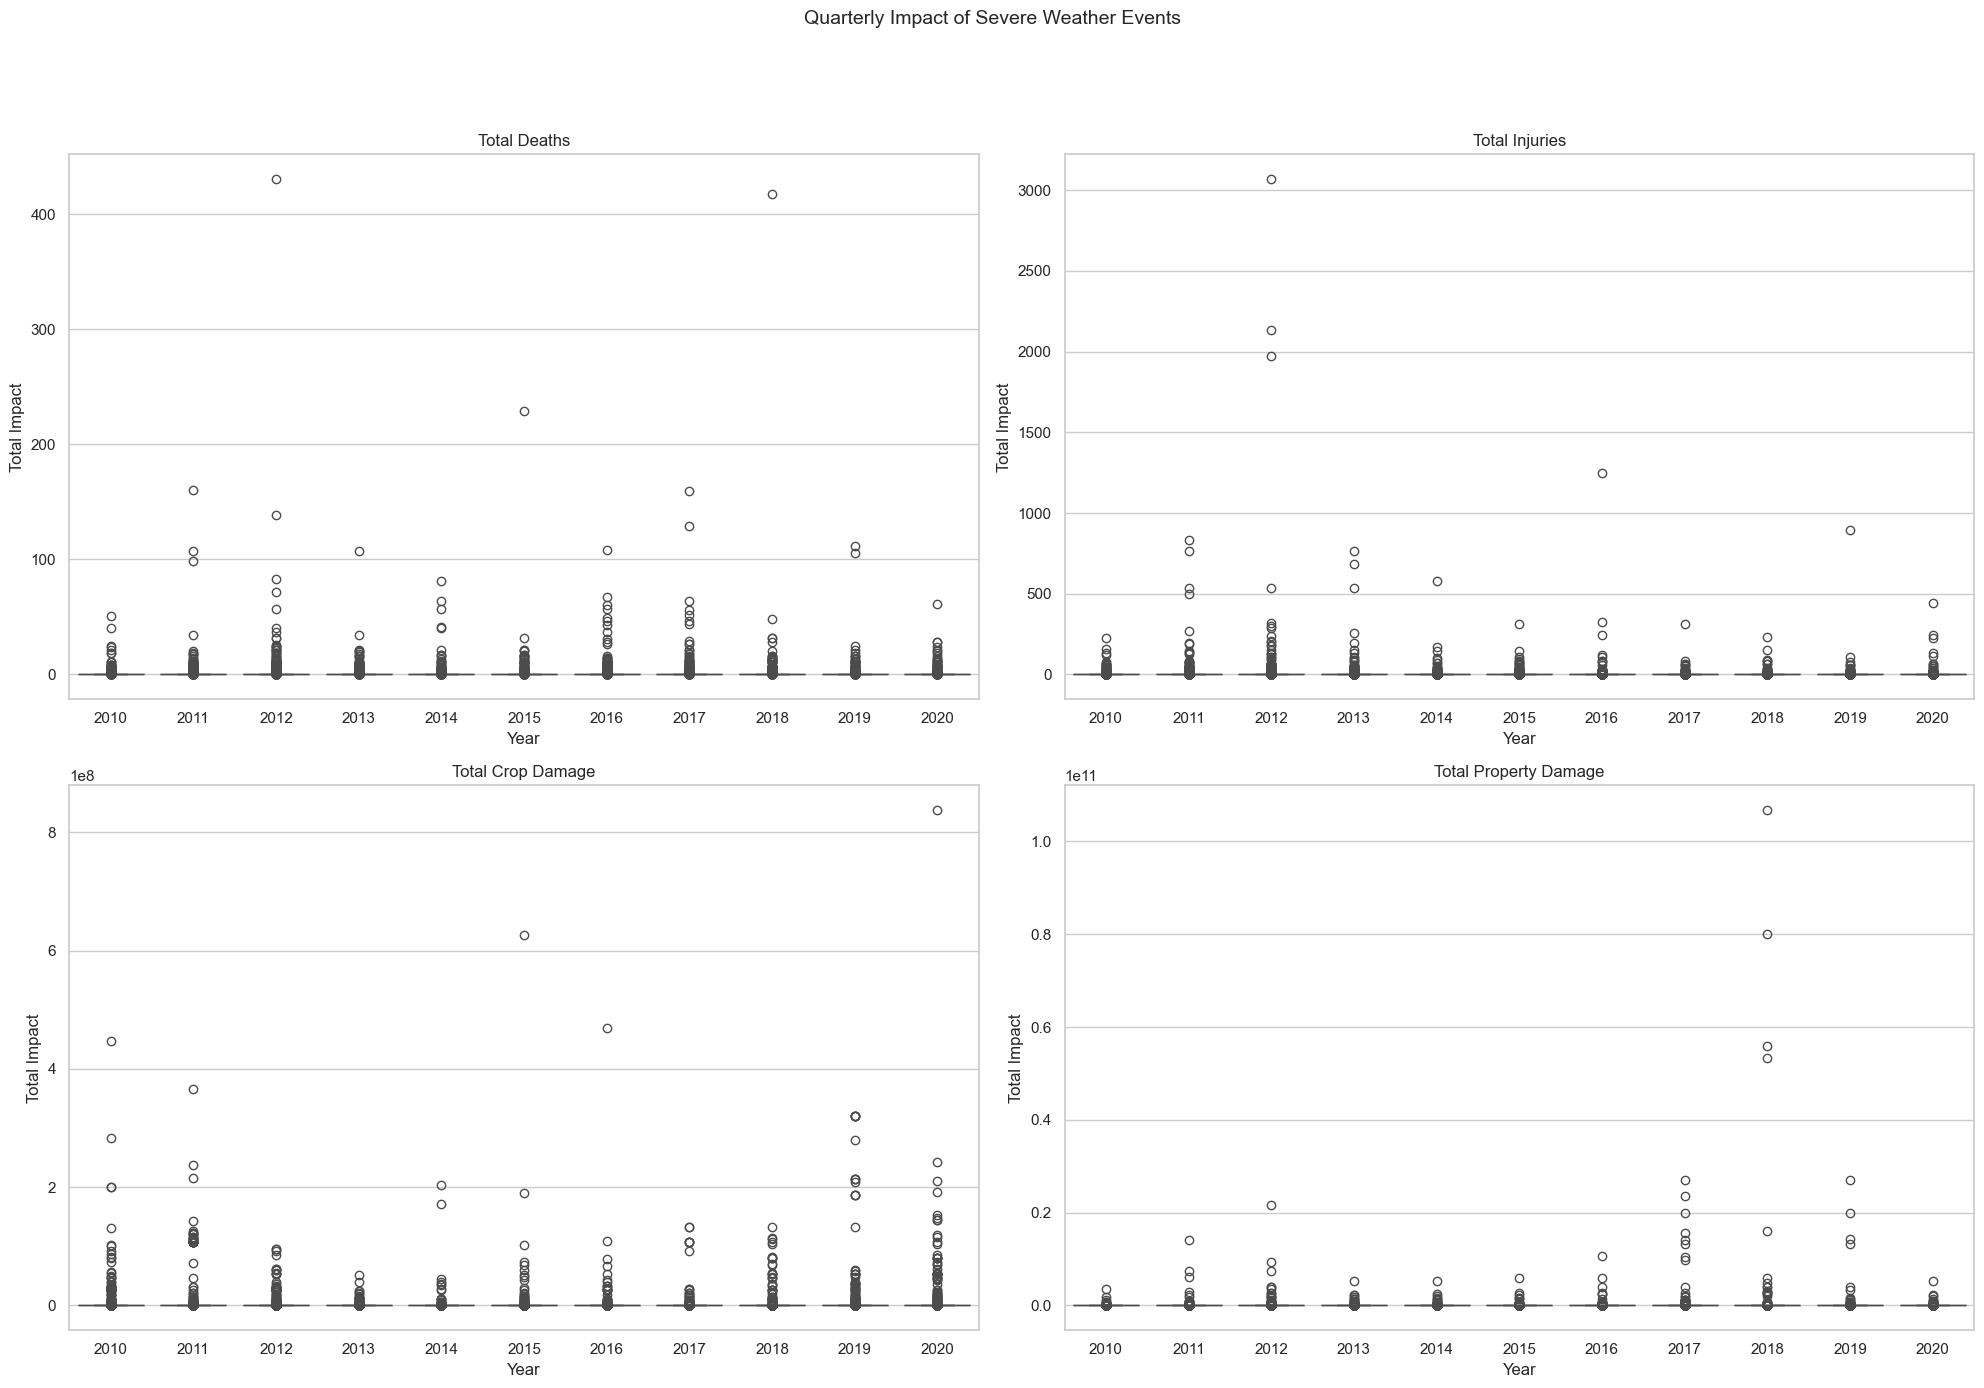

In [ ]:
sns.set_theme(style="whitegrid")

impact_metrics = {
    "Total Deaths": [col for col in training_data.columns if "total_deaths_" in col],
    "Total Injuries": [col for col in training_data.columns if "total_injuries_" in col],
    "Total Crop Damage": [col for col in training_data.columns if "total_crop_damage_" in col],
    "Total Property Damage": [col for col in training_data.columns if "total_property_damage_" in col],
}

fig, axs = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle("Quarterly Impact of Severe Weather Events", fontsize=14, y=1.02)

for ax, (title, cols) in zip(axs.flatten(), impact_metrics.items()):
    training_data[f"{title}_Total"] = training_data[cols].sum(axis=1)
    sns.boxplot(data=training_data, x="year", y=f"{title}_Total", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Year")
    ax.set_ylabel("Total Impact")

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### Quarterly Impact of Severe Weather Events
The plots above highlight the scale and frequency of severe weather impacts across U.S. counties between 2010 and 2020, with each point representing a single county-quarter observation:

- Total Deaths & Injuries: Most events result in relatively low human tolls, but the presence of outliers (e.g., >300 deaths or >2,000 injuries) signals the occasional occurrence of highly destructive events, such as major tornado outbreaks or hurricanes.

- Total Crop Damage: While the majority of events incur modest agricultural losses, several quarters show damages exceeding $100 million, underscoring the economic vulnerability of farming regions to climate extremes like floods and droughts.

- Total Property Damage: This category reveals the most extreme outliers, with some quarters seeing damage totals above $5 billion. These spikes likely correspond to landmark disasters such as hurricanes or wildfires affecting dense urban areas.

These distributions show that while many counties experience relatively minor impacts, the tail risk from severe weather events is significant and unevenly distributed. This reinforces the need to account for both frequency and magnitude in downstream modeling of socioeconomic effects.

## Initial Correlation 

### Median Income

To begin exploring relationships within the dataset, we ran a series of correlation tests focused on potential outcome variables that could be impacted by extreme climate conditions. Our initial hypothesis was that climate volatility—particularly severe weather events and rising temperatures—might negatively influence economic indicators such as median income. The rationale being that worsening environmental conditions could drive higher-income residents away from high-risk areas, leading to a decline in median earnings at the county level.

However, our analysis found no strong correlation between year-over-year percentage change in median income and any of the lagged or rolling climate-related variables. This suggests that, at least at the county level and within the available data window, median income is not significantly affected by recent climate or severe weather trends.

In [ ]:
# Define the weather-related variables (lagged and rolling)
weather_vars = [col for col in training_data.columns if (
    col.startswith("avg_temp_") or
    col.startswith("max_temp") or
    col.startswith("total_precip") or
    col.startswith("heat_days_90F") or
    col.startswith("num_events_") or
    col.startswith("total_injuries") or
    col.startswith("total_deaths") or
    col.startswith("total_property_damage") or
    col.startswith("total_crop_damage")
) and ("_pct" not in col and "_change" not in col)]  # exclude derived deltas

# Keep only relevant columns + target
corr_df = training_data[["median_income_pct"] + weather_vars].copy()

# Compute correlations
weather_corr = corr_df.corr()["median_income_pct"].drop("median_income_pct").sort_values(key=abs, ascending=False)

# Show top 20 most correlated weather features
print("Top correlated weather variables with % change in median income:")
print(weather_corr.head(20))


Top correlated weather variables with % change in median income:
num_events_debris_flow_roll3          0.049992
num_events_lightning_roll3           -0.047116
num_events_flood_roll3                0.044975
num_events_flood_lag1                 0.038522
num_events_debris_flow_lag1           0.037944
num_events_lightning_lag1            -0.036411
num_events_hail_roll3                -0.027706
max_temp_lag1                        -0.024302
avg_temp_q4_lag1                      0.023337
avg_temp_q3_lag1                      0.021364
num_events_hail_lag1                 -0.020804
avg_temp_q4_roll3                     0.017122
max_temp_roll3                       -0.016334
total_precip_roll3                    0.015704
avg_temp_q1_roll3                     0.015071
num_events_thunderstorm_wind_roll3   -0.014938
num_events_heavy_rain_roll3           0.014558
avg_temp_q1_lag1                      0.013815
total_property_damage_roll3           0.013578
num_events_heavy_rain_lag1            0.01

### GINI Index Correlation

Since our analysis of median income revealed no meaningful correlation with climate indicators, we turned our attention to a related but more nuanced measure: the GINI Index. The GINI Index is a normalized metric that captures income inequality within a region—ranging from 0 (perfect equality) to 1 (perfect inequality). Rather than focusing solely on the average income, this measure allows us to evaluate how income is distributed across residents of each county.

This shift in focus yielded more informative results. Several climate variables, particularly lagged and rolling average temperatures, showed moderate to strong positive correlations with the Gini Index. These findings suggest that counties experiencing sustained exposure to heat and extreme weather may also be those with more unequal wealth distribution.

This relationship raises the possibility that climate stressors disproportionately affect lower-income residents, potentially compounding vulnerability in already unequal communities. In areas where financial resilience is unevenly distributed, the impact of climate-related events could be more severe for marginalized populations. 

In [ ]:
# Define the weather-related variables (lagged and rolling)
weather_vars = [col for col in training_data.columns if (
    col.startswith("avg_temp_") or
    col.startswith("max_temp") or
    col.startswith("total_precip") or
    col.startswith("heat_days_90F") or
    col.startswith("num_events_") or
    col.startswith("total_injuries") or
    col.startswith("total_deaths") or
    col.startswith("total_property_damage") or
    col.startswith("total_crop_damage")
) and ("_pct" not in col and "_change" not in col)]  # exclude derived deltas

# Keep only relevant columns + target
corr_df = training_data[["gini_index"] + weather_vars].copy()

# Compute correlations
weather_corr = corr_df.corr()["gini_index"].drop("gini_index").sort_values(key=abs, ascending=False)

# Show top 20 most correlated weather features
print("Top correlated weather variables with gini_index:")
print(weather_corr.head(20))


Top correlated weather variables with gini_index:
avg_temp_q4_roll3                     0.392305
avg_temp_q4_lag1                      0.385947
avg_temp_q1_roll3                     0.379933
avg_temp_q1_lag1                      0.366713
avg_temp_q2_roll3                     0.339004
avg_temp_q2_lag1                      0.334169
avg_temp_q3_roll3                     0.311938
avg_temp_q3_lag1                      0.309872
heat_days_90F_roll3                   0.233581
heat_days_90F_lag1                    0.228531
total_precip_roll3                    0.158812
total_precip_lag1                     0.153266
max_temp_roll3                        0.142622
max_temp_lag1                         0.132763
num_events_flash_flood_roll3          0.128074
num_events_flash_flood_lag1           0.105667
num_events_lightning_roll3            0.101782
num_events_lightning_lag1             0.081465
num_events_thunderstorm_wind_roll3    0.078767
num_events_thunderstorm_wind_lag1     0.070026
Name: gini

### Migration Indicators

To further investigate how climate conditions may influence human behavior, we analyzed two measures of mobility from the ACS:

- The percentage of individuals who moved to a different city or county in the past year
- The percentage of individuals who moved within the same county

These indicators help assess whether extreme weather and climate stressors may be subtly shaping where people live—not necessarily through large-scale migration, but possibly through more localized shifts 

In [ ]:
# Define the weather-related variables (lagged and rolling)
weather_vars = [col for col in training_data.columns if (
    col.startswith("avg_temp_") or
    col.startswith("max_temp") or
    col.startswith("total_precip") or
    col.startswith("heat_days_90F") or
    col.startswith("num_events_") or
    col.startswith("total_injuries") or
    col.startswith("total_deaths") or
    col.startswith("total_property_damage") or
    col.startswith("total_crop_damage")
) and ("_pct" not in col and "_change" not in col)]  

training_data["pct_new_residents"] = (
    training_data["different_house_year_ago_different_city"] / training_data["total_pop"]
) * 100

# Keep only relevant columns + target
corr_df = training_data[["pct_new_residents"] + weather_vars].copy()

# Compute correlations
weather_corr = corr_df.corr()["pct_new_residents"].drop("pct_new_residents").sort_values(key=abs, ascending=False)

# Show top 20 most correlated weather features
print("Top correlated weather variables with % change in new residents:")
print(weather_corr.head(20))


Top correlated weather variables with % change in new residents:
avg_temp_q1_lag1              0.085607
avg_temp_q1_roll3             0.084700
total_precip_roll3            0.070072
total_precip_lag1             0.066922
avg_temp_q4_lag1              0.054137
avg_temp_q4_roll3             0.053947
num_events_flood_roll3       -0.049949
num_events_flood_lag1        -0.041082
heat_days_90F_roll3           0.028875
num_events_lightning_roll3    0.027184
heat_days_90F_lag1            0.027035
num_events_hail_roll3        -0.026573
num_events_hail_lag1         -0.023832
total_deaths_roll3            0.023171
num_events_lightning_lag1     0.021528
avg_temp_q2_lag1              0.019981
avg_temp_q2_roll3             0.019833
total_crop_damage_roll3      -0.017199
total_deaths_lag1             0.013754
num_events_tornado_roll3     -0.013738
Name: pct_new_residents, dtype: float64


In [ ]:
# Define the weather-related variables (lagged and rolling)
weather_vars = [col for col in training_data.columns if (
    col.startswith("avg_temp_") or
    col.startswith("max_temp") or
    col.startswith("total_precip") or
    col.startswith("heat_days_90F") or
    col.startswith("num_events_") or
    col.startswith("total_injuries") or
    col.startswith("total_deaths") or
    col.startswith("total_property_damage") or
    col.startswith("total_crop_damage")
) and ("_pct" not in col and "_change" not in col)]  # exclude derived deltas

training_data["pct_moved_residents"] = (
    training_data["different_house_year_ago_same_city"] / training_data["total_pop"]
) * 100

# Keep only relevant columns + target
corr_df = training_data[["pct_moved_residents"] + weather_vars].copy()

# Compute correlations
weather_corr = corr_df.corr()["pct_moved_residents"].drop("pct_moved_residents").sort_values(key=abs, ascending=False)

# Show top 20 most correlated weather features
print("Top correlated weather variables with % of existing residents who moved:")
print(weather_corr.head(20))


Top correlated weather variables with % of existing residents who moved:
max_temp_roll3                        0.237628
num_events_hail_roll3                 0.231035
heat_days_90F_roll3                   0.228508
max_temp_lag1                         0.218156
heat_days_90F_lag1                    0.213975
num_events_hail_lag1                  0.190689
num_events_flash_flood_roll3          0.113498
num_events_flash_flood_lag1           0.092999
total_precip_roll3                    0.085657
total_precip_lag1                     0.080438
avg_temp_q3_lag1                      0.066985
avg_temp_q3_roll3                     0.066761
num_events_tornado_roll3              0.064383
num_events_lightning_roll3            0.053081
total_injuries_roll3                  0.048002
avg_temp_q2_roll3                     0.046584
avg_temp_q2_lag1                      0.046105
num_events_tornado_lag1               0.044683
num_events_lightning_lag1             0.043165
num_events_thunderstorm_wind_roll3

### Migration Observations

We observed only weak correlations between climate variables and inter-county migration, which aligns with expectations. People tend to move across cities or regions for economic or educational reasons, with climate rarely serving as a primary motivator.

However, intra-county migration showed stronger correlation with extreme heat and severe weather indicators. This suggests that residents may be relocating locally after a disruptive event, rather than leaving the region altogether. Combined with the GINI Index findings, this pattern could indicate that low-income populations—those with fewer resources to move far—are adapting by shifting within their communities, preserving access to local employment, schools, and support networks.

## Limitations and Areas for Improvement

While this dataset offers a strong foundation for analyzing the relationship between climate trends and socioeconomic outcomes, several limitations remain:

**Station Coverage Bias**

Only counties with NOAA weather stations are represented in the dataset. This skews coverage toward more populous or strategically important areas, excluding many rural or low-population counties where climate impacts may be severe but less monitored.

**ACS Sampling Uncertainty**

The ACS is a survey-based dataset, and especially in sparsely populated counties, estimates may carry significant margins of error—particularly for subgroup metrics like education or mobility.

**Lag Structure Assumptions**

Our implementation assumes a one-year lag between climate events and socioeconomic response. This may not reflect real-world delays, which could vary depending on the nature of the event (e.g., heat waves vs. hurricanes) or the capacity of local governments to respond.

To account for longer-term effects, we included 3-year rolling averages for key climate predictors. However, further analysis is required to evaluate multicollinearity and determine which features meaningfully contribute to predictive power. This will help refine the feature set for future modeling.

**Confounding Variables**

Economic shifts, housing policy, infrastructure investment, and other non-climatic factors may influence migration, income trends, and inequality. These were not controlled for in the current version of the dataset.


## Opportunities for expansion/improvement of data quality
Even though we are working with solid datasets from NOAA and the ACS, there is defintely room for improving the quality and depth of our analysis as we go.

For starters, the NOAA weather data is collected from individual stations and then averaged at the county level. That works fine in most cases, but in rural areas where there aren’t as many stations, the weather data might not fully capture what’s actually happening on the ground. In the future, we could try adding in more localized data (gridded datasets or satellite-based weather records) to get a clearer picture, especially in less densely monitored areas.

Also, while the ACS gives us a good overview of things like income, employment, and education, we might be missing other important pieces of the puzzle. If we had access to public health data, infrastructure stats, or emergency preparedness measures, we could better understand why some communities bounce back from extreme weather better than others. Zooming in geographically down to zip code or census tract could also help us spot patterns that get smoothed over at the county level.

## Next Steps

With the full dataset constructed and initial exploratory analysis complete, our next step is to begin a more rigorous statistical investigation of the relationships surfaced so far. This will include:

- Exploring multicollinearity across weather variables to identify redundant features or overlapping signals
- Refining the correlation analysis to better isolate key predictors of socioeconomic outcomes like income, mobility, and inequality
- Laying the foundation for predictive modeling, using lagged and rolling features to estimate future changes in economic and demographic indicators
- Sharing results publicly via a GitHub repository, enabling access by researchers, policy analysts, and fellow students for further analysis, visualization, and development

This next phase will help translate observed patterns into actionable insights — clarifying not just where change is occurring, but what variables may be driving it.